<a href="https://colab.research.google.com/github/Sakshiipaidalwar/Codsoft-Intern-Project-1/blob/main/Sales_Prediction_System_Using_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SALES PREDICTION SYSTEM USING PYTHON

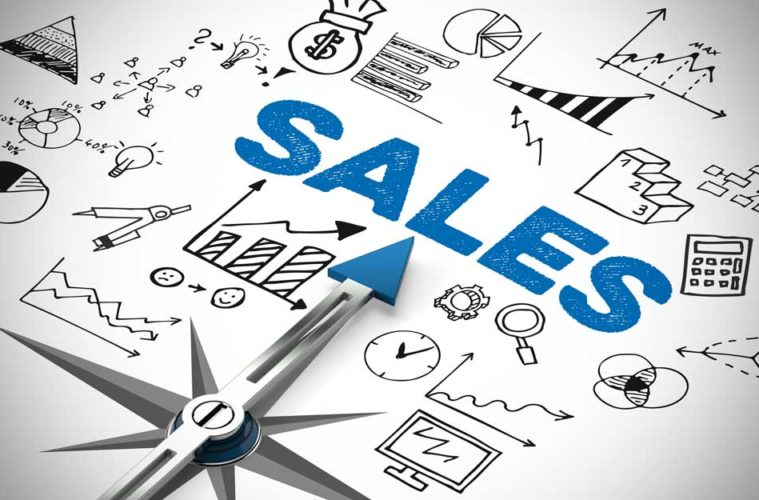

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
 By leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
dg=pd.read_csv("/content/advertising.csv")

In [ ]:
dg

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
dg.sample(10)

,TV,Radio,Newspaper,Sales
26,142.9,29.3,12.6,15.0
188,286.0,13.9,3.7,20.9
198,283.6,42.0,66.2,25.5
152,197.6,23.3,14.2,16.6
66,31.5,24.6,2.2,11.0
144,96.2,14.8,38.9,12.3
159,131.7,18.4,34.6,12.9
28,248.8,27.1,22.9,18.9
194,149.7,35.6,6.0,17.3
99,135.2,41.7,45.9,17.2


In [ ]:
dg.sample

<bound method NDFrame.sample of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
dg.shape

(200, 4)

In [ ]:
dg.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
dg.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
dg.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
dg.shape

(200, 4)

In [ ]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dg.size

800

In [ ]:
dg.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
dg.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
dg.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
dg.duplicated().sum()

0

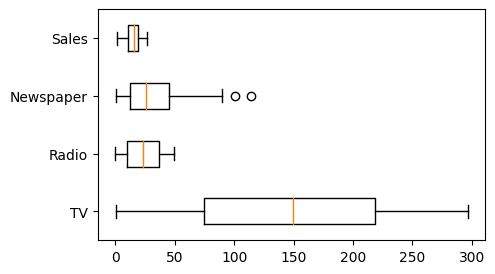

In [ ]:
plt.figure(figsize=[5,3])
plt.boxplot(dg,vert=False,data=dg,labels=dg.columns)
plt.show()

## Analysing data by histplot graph

<Axes: xlabel='TV', ylabel='Count'>

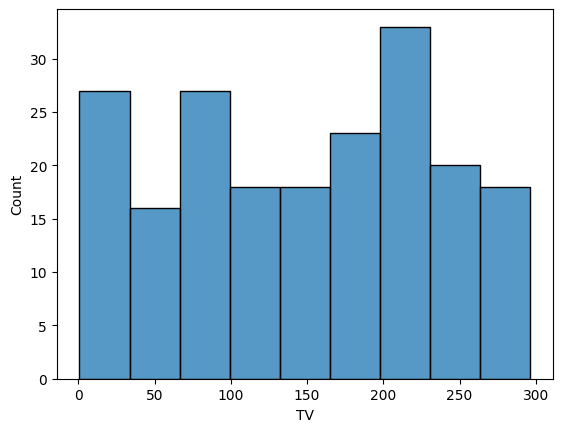

In [ ]:
sns.histplot(dg['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

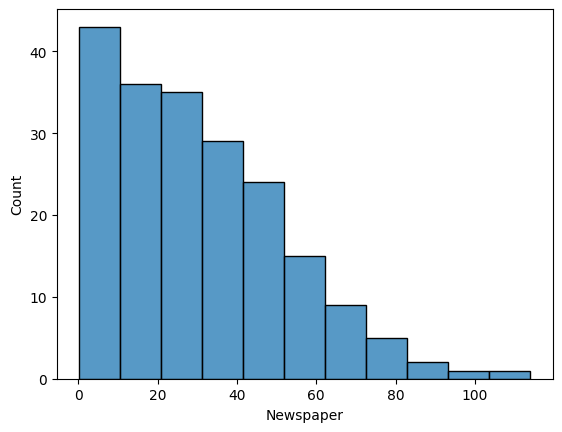

In [ ]:
sns.histplot(dg['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

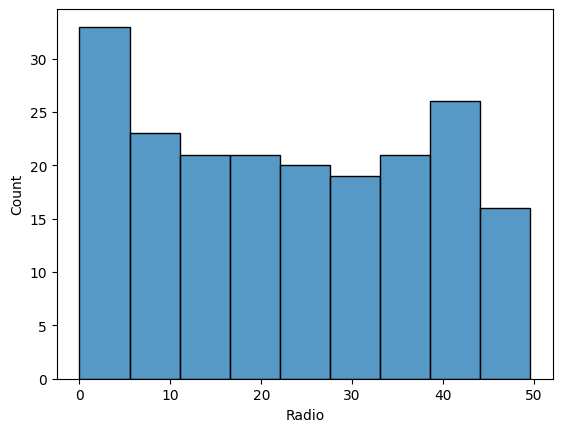

In [ ]:
sns.histplot(dg['Radio'])

<Axes: xlabel='Sales', ylabel='Count'>

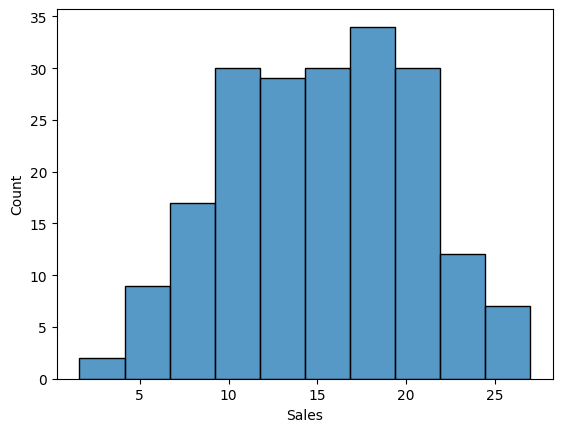

In [ ]:
sns.histplot(dg['Sales'])

## Analysing data by distplot graph

<ipython-input-28-7120ac8f1cab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dg['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

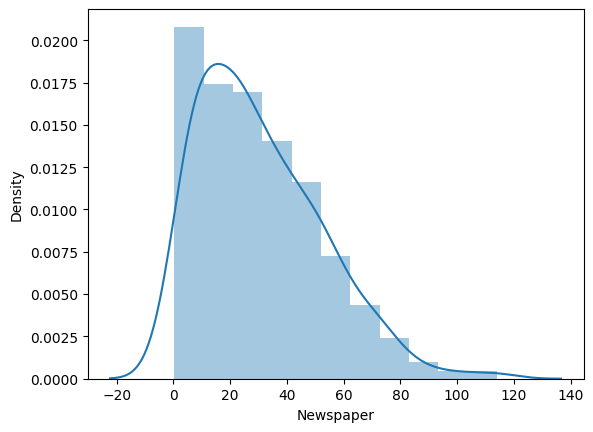

In [ ]:
sns.distplot(dg['Newspaper'])

<ipython-input-29-77b0bb525a05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dg['TV'])


<Axes: xlabel='TV', ylabel='Density'>

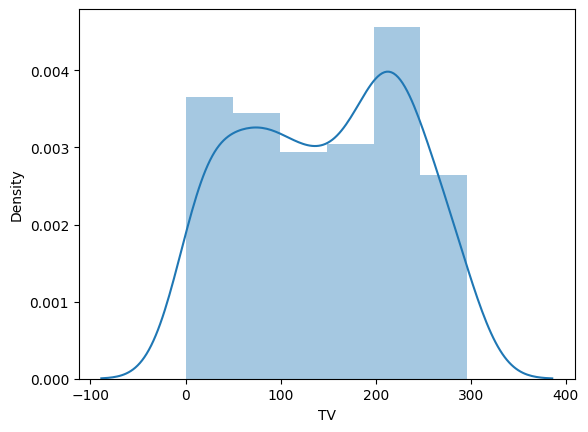

In [ ]:
sns.distplot(dg['TV'])

##Analyse data by pairplot graph

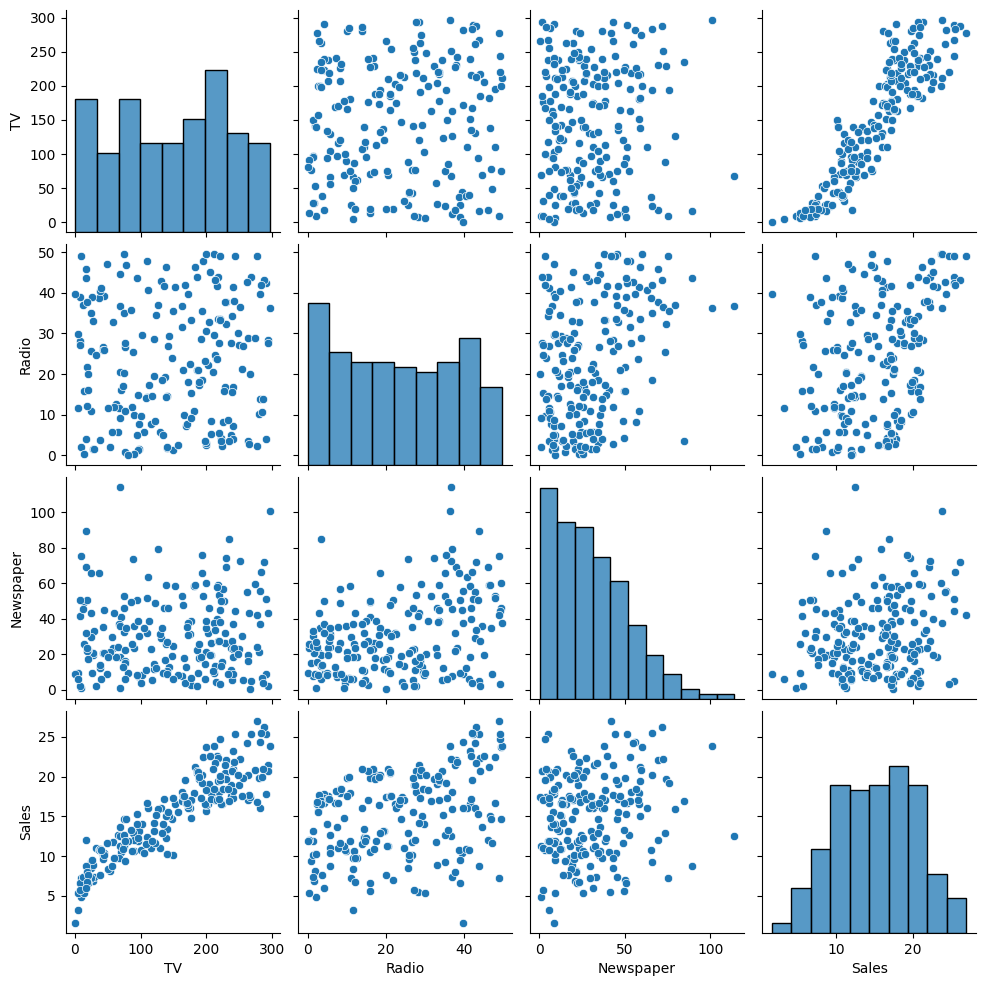

In [ ]:
sns.pairplot(dg)

<Axes: >

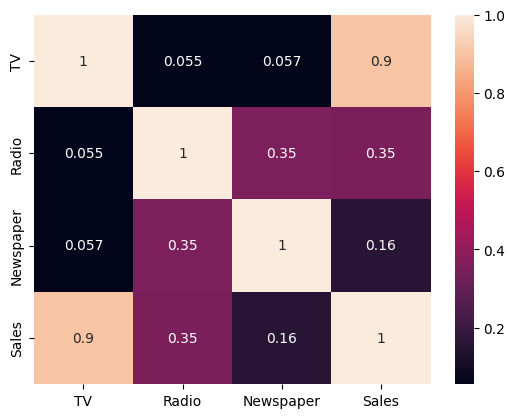

In [ ]:
sns.heatmap(dg.corr(),annot=True)

Train the model with the Advertising data set

In [ ]:
x=dg.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y = dg.iloc[:,-1:]

## Splitting Train & Test Data

In [ ]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=50)

In [ ]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=50)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 3)
(140, 3)
(60, 3)


In [ ]:
xtrain,ytrain

(        TV  Radio  Newspaper
 114   78.2   46.8       34.5
 187  191.1   28.7       18.2
 76    27.5    1.6       20.7
 122  224.0    2.4       15.6
 142  220.5   33.2       37.9
 ..     ...    ...        ...
 132    8.4   27.2        2.1
 33   265.6   20.0        0.3
 109  255.4   26.9        5.5
 139  184.9   43.9        1.7
 176  248.4   30.2       20.3
 
 [140 rows x 3 columns],
      Sales
 114   14.6
 187   17.3
 76     6.9
 122   16.6
 142   20.1
 ..     ...
 132    5.7
 33    17.4
 109   19.8
 139   20.7
 176   20.2
 
 [140 rows x 1 columns])

In [ ]:
xtest,ytest

(        TV  Radio  Newspaper
 112  175.7   15.4        2.4
 165  234.5    3.4       84.8
 12    23.8   35.1       65.9
 73   129.4    5.7       31.3
 144   96.2   14.8       38.9
 20   218.4   27.7       53.4
 199  232.1    8.6        8.7
 8      8.6    2.1        1.0
 39   228.0   37.7       32.0
 88    88.3   25.5       73.4
 81   239.8    4.1       36.9
 197  177.0    9.3        6.4
 69   216.8   43.9       27.2
 160  172.5   18.1       30.7
 25   262.9    3.5       19.5
 99   135.2   41.7       45.9
 151  121.0    8.4       48.7
 23   228.3   16.9       26.2
 138   43.0   25.9       20.5
 159  131.7   18.4       34.6
 89   109.8   47.8       51.4
 82    75.3   20.3       32.5
 24    62.3   12.6       18.3
 174  222.4    3.4       13.1
 137  273.7   28.9       59.7
 83    68.4   44.5       35.6
 107   90.4    0.3       23.2
 34    95.7    1.4        7.4
 97   184.9   21.0       22.0
 167  206.8    5.2       19.4
 123  123.1   34.6       12.4
 157  149.8    1.3       24.3
 75    16.

## Model Fitting & Predictions

Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypredict=model.predict(xtest)
ypredict

array([[15.82287053],
       [18.38101053],
       [ 9.78264322],
       [12.46087358],
       [11.58422768],
       [19.73993998],
       [18.3016727 ],
       [ 5.22074911],
       [21.14558899],
       [12.43584245],
       [18.449478  ],
       [15.30593478],
       [21.11929212],
       [16.09181908],
       [19.56127347],
       [16.49356718],
       [12.37455046],
       [19.03408131],
       [ 9.64057428],
       [13.88616431],
       [15.73422392],
       [10.94036592],
       [ 9.35812793],
       [17.26845378],
       [22.96256067],
       [13.01166282],
       [ 9.70750539],
       [10.01424674],
       [17.01669673],
       [16.62431199],
       [14.9024671 ],
       [13.10502383],
       [10.41053844],
       [17.90338765],
       [ 8.93052585],
       [ 9.7252941 ],
       [13.24487612],
       [22.07299829],
       [10.70373996],
       [11.58216453],
       [ 8.57686012],
       [25.2254912 ],
       [ 9.81666063],
       [18.2413541 ],
       [18.18154993],
       [10

In [ ]:
model.score(xtrain,ytrain)*100

89.947321081557

In [ ]:
model.score(xtest,ytest)*100

90.52057285496889

In [ ]:
mean_squared_error(ytest,ypredict)

1.9946758056330078

In [ ]:
mean_absolute_error(ytest,ypredict)

1.1160831220473184

In [ ]:
r2_score(ytest,ypredict)*100

90.52057285496889

In [ ]:
r = np.sqrt(mean_squared_error(ytest,ypredict))
r

1.4123299209579212

In [ ]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
score=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(score)
finalscore

0.8958891495842238